# Pima Indians Diabetes
* İlgili verimizi LogisticRegression, LinearRegression, RandomForest ve NaiveBayes algoritmaları ile başarı metriklerine bakacğaı.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import seaborn as sns

#ploltly
from plotly.offline import init_notebook_mode, iplot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("Untitled Folder/veri-seti.txt", delimiter="\t", header=None, 
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pima Kızılderilileri Diyabet Veri Seti
Pima Kızılderilileri Diyabet Veri Kümesi, tıbbi bilgileri verilen Pima Kızılderililerinde 5 yıl içinde diyabet başlangıcının tahmin edilmesini içerir.

İkili (2 sınıflı) bir sınıflandırma problemidir. Her sınıf için gözlem sayısı dengeli değildir. 8 girdi değişkeni ve 1 çıktı değişkeni ile 768 gözlem vardır. Kayıp değerlerin sıfır değerleri ile kodlandığı düşünülmektedir. Değişken isimleri aşağıdaki gibidir:

* Hamile kalma sayısı.
* Oral glukoz tolerans testinde 2 saatte plazma glukoz konsantrasyonu.
* Diyastolik kan basıncı (mm Hg).
* Triseps deri kıvrım kalınlığı (mm).
* 2 saatlik serum insülini (mu U/ml).
* Vücut kitle indeksi (kg cinsinden ağırlık/(m cinsinden boy)^2).
* Diyabet soyağacı fonksiyonu.
* Yaş (yıl).
* Sınıf değişkeni (0 veya 1).


In [4]:
def analız(dataframe):
    print("************* TYPE  **************")
    print(dataframe.dtypes)
    print("************* INFO  **************")
    print(dataframe.info())
    print("************* SHAPE **************")
    print(dataframe.shape)
    print("************* NA  **************")
    print(dataframe.isnull().sum())
       
analız(df)

************* TYPE  **************
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
************* INFO  **************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    f

* Toplam 8 değişkenimiz ve bir adet hedef değişkenimiz bulunmaktadır. Bunların 6 tanesi int diğer iki tanesi ise float değerlerdir.Hedef değişkenimiz ise 0 ve 1'lerden oluşmaktadır.
* Eksik değerimiz bulunmamaktadır.
* 768 tane değer bulunmakta.

In [5]:
df.describe(percentiles=[0,0.05,0.95,0.99,1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,0.00000,3.0000,10.00000,13.00000,17.00,17.00
Glucose,768.0,120.894531,31.972618,0.000,0.000,79.00000,117.0000,181.00000,196.00000,199.00,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.000,38.70000,72.0000,90.00000,106.00000,122.00,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,44.00000,51.33000,99.00,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,293.00000,519.90000,846.00,846.00
BMI,768.0,31.992578,7.884160,0.000,0.000,21.80000,32.0000,44.39500,50.75900,67.10,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.078,0.14035,0.3725,1.13285,1.69833,2.42,2.42
Age,768.0,33.240885,11.760232,21.000,21.000,21.00000,29.0000,58.00000,67.00000,81.00,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.00000,1.00,1.00


In [6]:
num_cols = df.columns.tolist()  

num_cols.remove('Outcome')
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

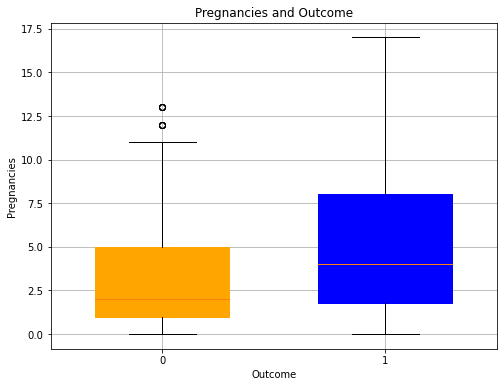

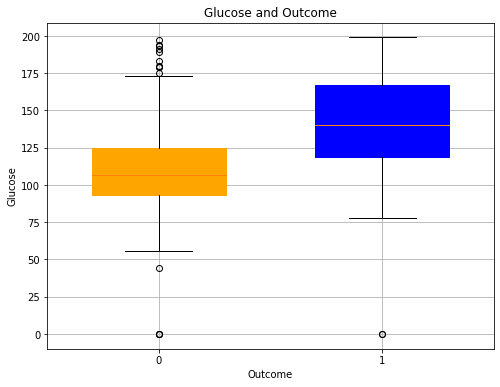

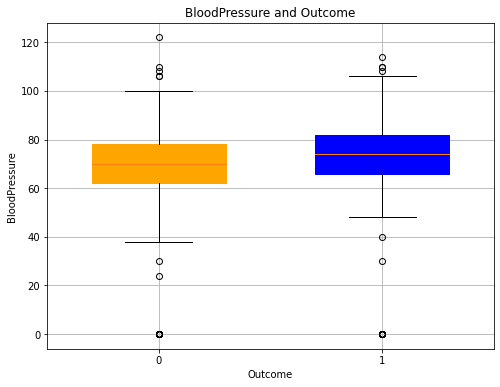

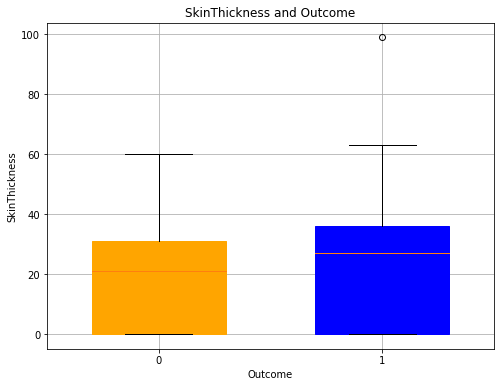

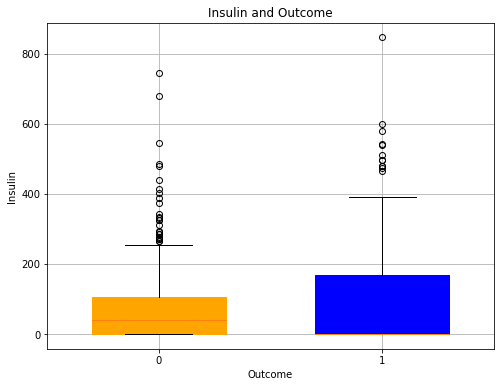

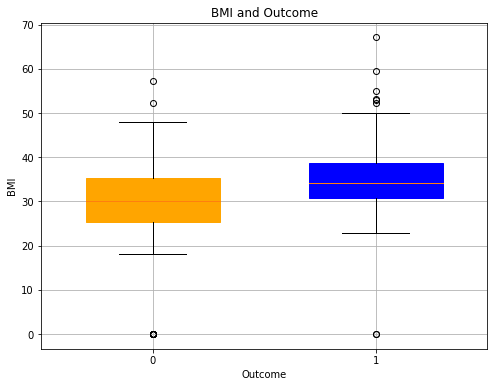

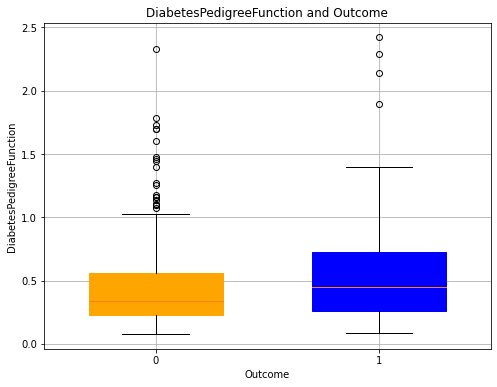

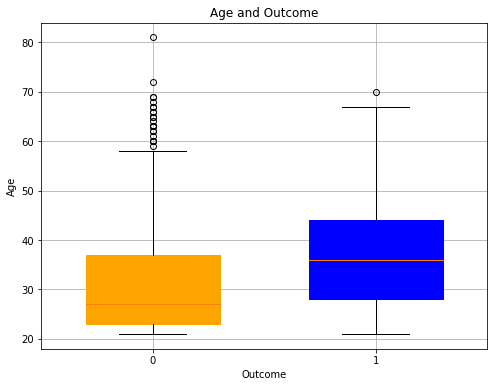

In [18]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for col in num_cols:
    plt.figure(figsize=(8, 6))
    for outcome_value, color in zip(df['Outcome'].unique(), colors):
        subset = df[df['Outcome'] == outcome_value]
        plt.boxplot(subset[col], positions=[outcome_value], widths=0.6, patch_artist=True, boxprops=dict(facecolor=color, color=color))
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.title('{} and Outcome'.format(col))
    plt.grid(True)
    plt.show()

PCA için açıklanan varyans oranları (ilk iki bileşen): [0.26179749 0.21640127]


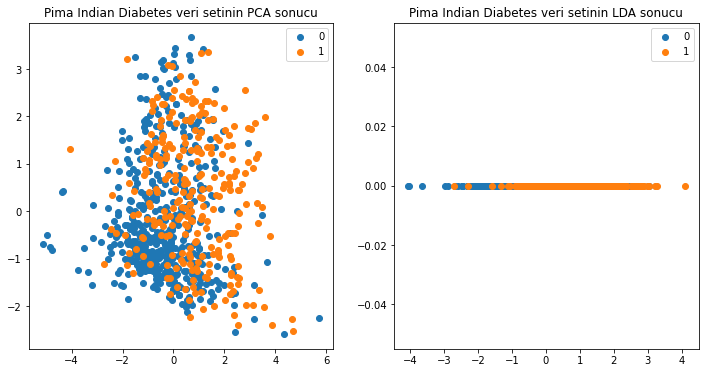

In [8]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Verileri ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_scaled)

# LDA uygulama
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit_transform(X_scaled, y)

# PCA için açıklanan varyans oranlarını yazdırma
print("PCA için açıklanan varyans oranları (ilk iki bileşen):", pca.explained_variance_ratio_)

# Görselleştirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i in np.unique(y):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], label=i)
plt.legend()
plt.title('Pima Indian Diabetes veri setinin PCA sonucu')

plt.subplot(1, 2, 2)
for i in np.unique(y):
    plt.scatter(X_r2[y == i, 0], np.zeros_like(X_r2[y == i, 0]), label=i)
plt.legend()
plt.title('Pima Indian Diabetes veri setinin LDA sonucu')

plt.show()

In [9]:
print("PCA Açıklanan varyans oranları:", pca.explained_variance_ratio_)
print("PCA Bileşenlerin ağırlıkları:\n", pca.components_)
print("LDA Bileşenlerin ağırlıkları:\n", lda.scalings_)

PCA Açıklanan varyans oranları: [0.26179749 0.21640127]
PCA Bileşenlerin ağırlıkları:
 [[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]
LDA Bileşenlerin ağırlıkları:
 [[ 0.31607552]
 [ 0.86226241]
 [-0.20560649]
 [ 0.01122858]
 [-0.09477594]
 [ 0.4756584 ]
 [ 0.22222693]
 [ 0.14043251]]


In [10]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, validation_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

C:\Users\vbrha\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



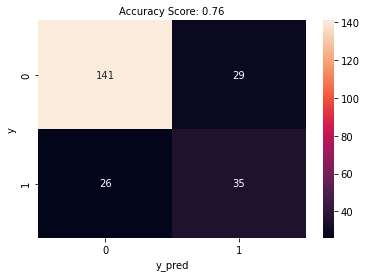

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       170
           1       0.55      0.57      0.56        61

    accuracy                           0.76       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.77      0.76      0.76       231



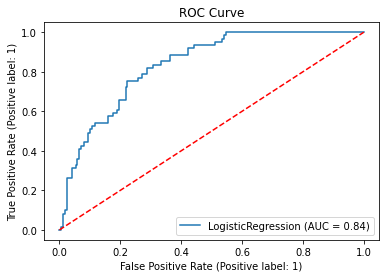

In [11]:
X_scaled = StandardScaler().fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
log_model =LogisticRegression(solver='liblinear').fit(X_train,y_train)
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

roc_auc_score(y_test, y_prob)

roc_display = RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1],[0, 1], 'r--')
plt.show()

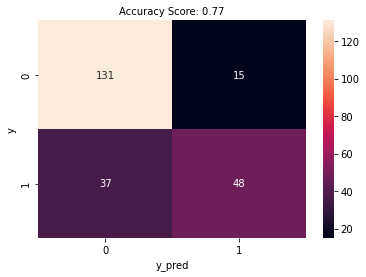

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.56      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



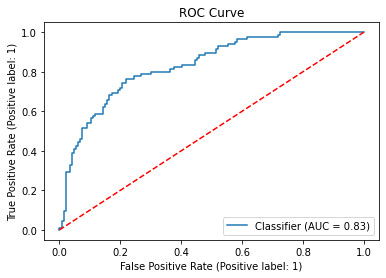

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_scaled = StandardScaler().fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

# Linear Regresyon modelini oluşturun ve eğitin
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Tahminler yapın
y_pred_lin = lin_model.predict(X_test)

# Tahminleri sınıflara ayırın (örneğin, 0.4 eşik değeri kullanarak)
y_pred_class = (y_pred_lin >= 0.5).astype(int)

plot_confusion_matrix(y_test, y_pred_class)

# Sınıflandırma metriklerini hesaplayın
print(classification_report(y_test, y_pred_class))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_lin)
plt.title('ROC Curve')
plt.plot([0, 1],[0, 1], 'r--')
plt.show()

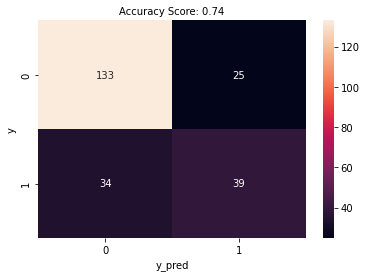

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       158
           1       0.61      0.53      0.57        73

    accuracy                           0.74       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.74      0.74      0.74       231



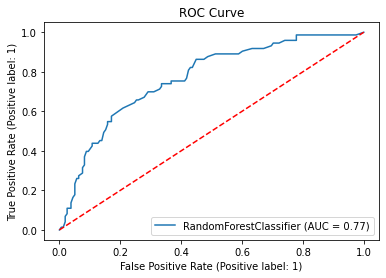

In [13]:
X_scaled = StandardScaler().fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
rbc_model = RandomForestClassifier(random_state=17).fit(X_train,y_train)
y_pred = rbc_model.predict(X_test)
y_prob = rbc_model.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, y_pred)

# Sınıflandırma metriklerini hesaplayın
print(classification_report(y_test, y_pred))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_estimator(rbc_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1],[0, 1], 'r--')
plt.show()

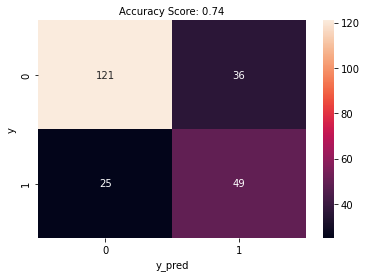

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       157
           1       0.58      0.66      0.62        74

    accuracy                           0.74       231
   macro avg       0.70      0.72      0.71       231
weighted avg       0.75      0.74      0.74       231



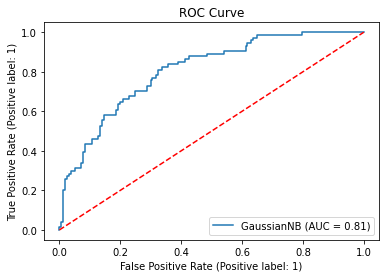

In [14]:
X_scaled = StandardScaler().fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
nbc_model = GaussianNB().fit(X_train,y_train)
y_pred = nbc_model.predict(X_test)
y_prob = nbc_model.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, y_pred)

# Sınıflandırma metriklerini hesaplayın
print(classification_report(y_test, y_pred))

# ROC eğrisini çizin
roc_display = RocCurveDisplay.from_estimator(nbc_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1],[0, 1], 'r--')
plt.show()